In [215]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt 


In [216]:
df = pd.read_csv('heart.csv',header=None)

df.columns = ['age','sex','cp','testbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','Target']
df.head()

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [217]:
counter = 0
missing_colunm = []
for x in df.columns:
    if len(df.loc[(df[x] == '?')]) > 0:
        counter +=1
        missing_colunm.append(x)
print(missing_colunm)

[]


In [218]:
df.dtypes

age          int64
sex          int64
cp           int64
testbps      int64
chol         int64
fbs          int64
restecg      int64
thalach      int64
exang        int64
oldpeak    float64
slope        int64
ca           int64
thal         int64
Target       int64
dtype: object

In [219]:
X = df.drop('Target' ,axis =1).copy()
X.head()



,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [220]:
y= df['Target'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Target, dtype: int64

In [221]:
X_encoded = pd.get_dummies(X, columns = ['cp','thal','ca','slope','restecg'])
X_encoded.head()

,age,sex,testbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,ca_1,ca_2,ca_3,ca_4,slope_0,slope_1,slope_2,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,0,...,0,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,0,0,0,1,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,0,0,0,0,1,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,0,0,0,0,1,0,1,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,0,0,0,0,0,1,0,1,0


In [301]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=0)

#tree_clf = DecisionTreeClassifier(criterion="entropy",random_state=0)
#tree_clf = DecisionTreeClassifier(criterion="gini",random_state=0)
tree_clf = DecisionTreeClassifier(random_state=0)

tree_clf = tree_clf.fit(X_train,y_train)

y_predict_test = tree_clf.predict(X_test)
y_predict_train = tree_clf.predict(X_train)

print("Accuracy for test data:",metrics.accuracy_score(y_predict_test,y_test))
print("Accuracy for train data:",metrics.accuracy_score(y_predict_train,y_train))


Accuracy for test data: 0.7142857142857143
Accuracy for train data: 1.0


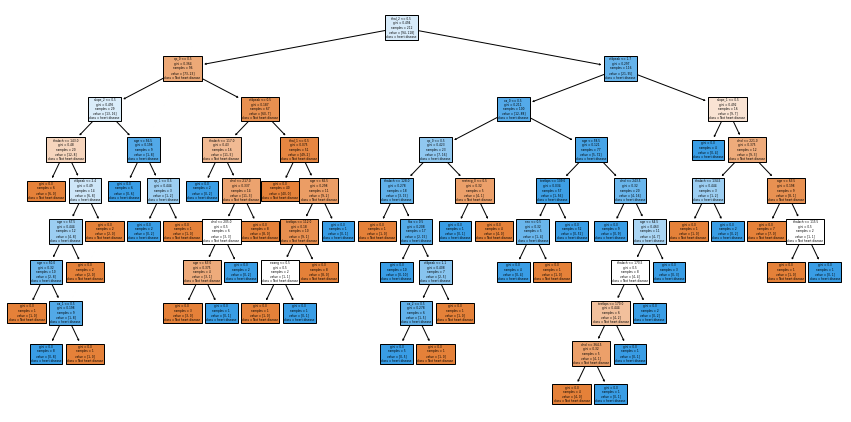

In [305]:
plt.figure(figsize=[15,7.5])
plot_tree(tree_clf,filled= True,class_names=['Not heart disease','heart disease'], feature_names= X_encoded.columns)
plt.show()

confusion Matrix (Train)


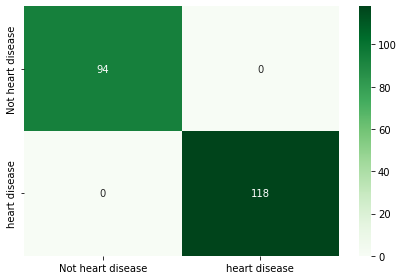

confusion Matrix (Test)


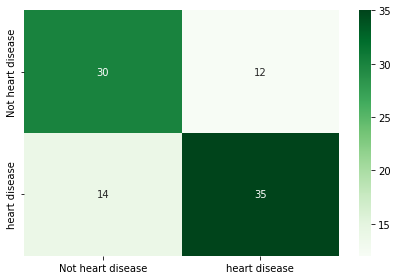

In [306]:
cf_train = metrics.confusion_matrix(y_predict_train,y_train)
cf_test = metrics.confusion_matrix(y_predict_test,y_test)
sn.heatmap(cf_train,annot=True,yticklabels=classes,xticklabels=classes,cmap='Greens', fmt='g')

print("confusion Matrix (Train)")

plt.tight_layout()
plt.show()
print("confusion Matrix (Test)")
sn.heatmap(cf_test,annot=True,yticklabels=classes,xticklabels=classes,cmap='Greens', fmt='g')

plt.tight_layout()
plt.show()

In [307]:
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

[0.         0.00419287 0.00419287 0.00424528 0.00463423 0.00481872
 0.00554939 0.0058064  0.00628931 0.00655136 0.00693674 0.00707547
 0.00754717 0.00754717 0.00808625 0.00862534 0.00938653 0.01219186
 0.01293801 0.01399552 0.01591981 0.02547902 0.03819352 0.16634807]


In [308]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

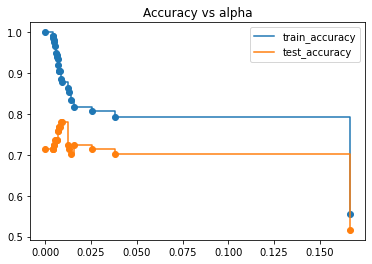

In [309]:
train_acc = []
test_acc = []
tree_size_train=[]
tree_size_test=[]

for c in clfs:
    y_predect_train = c.predict(X_train)
    y_predect_test = c.predict(X_test)
    train_acc.append(metrics.accuracy_score(y_predect_train, y_train))
    test_acc.append(metrics.accuracy_score(y_predect_test, y_test))
    
plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()

plt.title('Accuracy vs alpha')
plt.show()


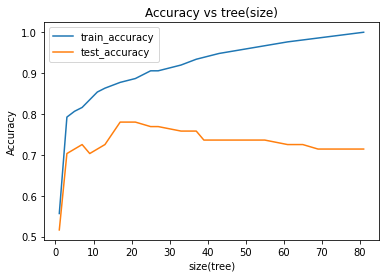

In [310]:
train_acc = []
test_acc = []
tree_size_train=[]
tree_size_test=[]

for c in clfs:
    y_predect_train = c.predict(X_train)
    y_predect_test = c.predict(X_test)
    tree_size_train.append(c.tree_.node_count)
    train_acc.append(metrics.accuracy_score(y_predect_train, y_train))
    test_acc.append(metrics.accuracy_score(y_predect_test, y_test))
    

plt.plot(tree_size_train,train_acc,label='train_accuracy')
plt.plot(tree_size_train,test_acc,label='test_accuracy')
plt.legend()
plt.xlabel("size(tree)")
plt.ylabel("Accuracy")
plt.title('Accuracy vs tree(size)')
plt.show()

In [315]:
tree_clf = DecisionTreeClassifier(random_state=0,ccp_alpha=0.01)
tree_clf = tree_clf.fit(X_train,y_train)

y_predict_test1 = tree_clf.predict(X_test)
y_predict_train1 = tree_clf.predict(X_train)

print("Accuracy for test data:",metrics.accuracy_score(y_predict_test1,y_test))
print("Accuracy for train data:",metrics.accuracy_score(y_predict_train1,y_train))


Accuracy for test data: 0.7802197802197802
Accuracy for train data: 0.8773584905660378


confusion Matrix (Train)


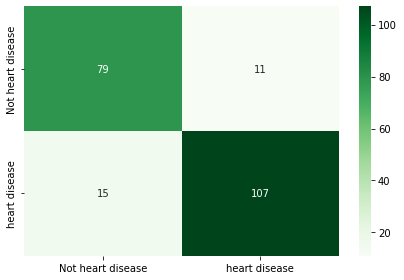

confusion Matrix (Test)


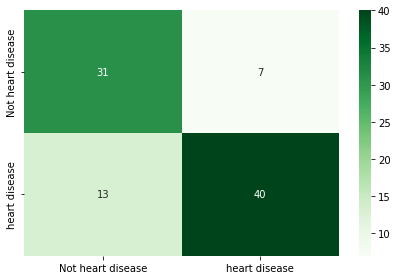

In [316]:
cf_train = metrics.confusion_matrix(y_predict_train1,y_train)
cf_test = metrics.confusion_matrix(y_predict_test1,y_test)
sn.heatmap(cf_train,annot=True,yticklabels=classes,xticklabels=classes,cmap='Greens', fmt='g')

print("confusion Matrix (Train)")

plt.tight_layout()
plt.show()
print("confusion Matrix (Test)")
sn.heatmap(cf_test,annot=True,yticklabels=classes,xticklabels=classes,cmap='Greens', fmt='g')

plt.tight_layout()
plt.show()


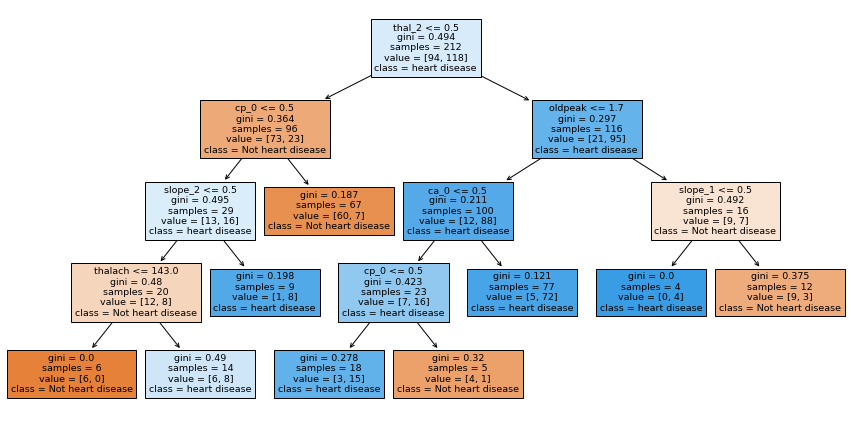

In [317]:
plt.figure(figsize=[15,7.5])

plot_tree(tree_clf,filled= True,class_names=['Not heart disease','heart disease'], feature_names= X_encoded.columns);